In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
#extract file
df = pd.read_csv('retentiondata_case.csv' )
print(df.shape)
print(df.describe(include='all'))
# print(df.value_counts())
## added comment for git

(5636, 36)
          acct_ref      cust_ref has_dependents    tenure_mo home_phone  \
count         5636          5636           5636  5636.000000       5636   
unique        5621          5636              2          NaN          2   
top     ACCT940714  CUST61880322             No          NaN        Yes   
freq             2             1           3957          NaN       5079   
mean           NaN           NaN            NaN    32.445174        NaN   
std            NaN           NaN            NaN    24.515986        NaN   
min            NaN           NaN            NaN     0.000000        NaN   
25%            NaN           NaN            NaN     9.000000        NaN   
50%            NaN           NaN            NaN    29.000000        NaN   
75%            NaN           NaN            NaN    55.000000        NaN   
max            NaN           NaN            NaN    72.000000        NaN   

       multi_line internet_plan add_on_security add_on_backup  \
count        5636      

In [4]:
df_holdout = pd.read_csv('retentiondata_case_holdout.csv' )
print(df_holdout.shape)
print(df_holdout.describe(include='all'))

(1407, 36)
          acct_ref      cust_ref has_dependents    tenure_mo home_phone  \
count         1407          1407           1407  1407.000000       1407   
unique        1407          1407              2          NaN          2   
top     ACCT316552  CUST36921357             No          NaN        Yes   
freq             1             1            976          NaN       1282   
mean           NaN           NaN            NaN    32.074627        NaN   
std            NaN           NaN            NaN    24.739484        NaN   
min            NaN           NaN            NaN     0.000000        NaN   
25%            NaN           NaN            NaN     9.000000        NaN   
50%            NaN           NaN            NaN    27.000000        NaN   
75%            NaN           NaN            NaN    56.000000        NaN   
max            NaN           NaN            NaN    72.000000        NaN   

       multi_line internet_plan add_on_security add_on_backup  \
count        1407      

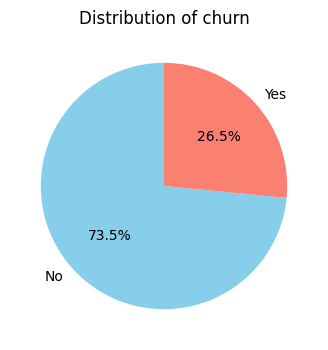

In [7]:
import matplotlib.pyplot as plt

counts = df['left_flag'].value_counts()

#  pie chart
plt.figure(figsize=(4,4))
patches, texts, autotexts = plt.pie(
    counts, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'salmon']
)

plt.title('Distribution of churn')
plt.show()


In [115]:
df

,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,tech_support_std,stream_tv,stream_movies,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,1,No,No phone service,DSL,No,Yes,No,No,No,No,...,Offer E,0.00,DSL,10,No,No,Yes,0.00,0,0.00
1,34,Yes,No,DSL,Yes,No,Yes,No,No,No,...,No Offer,17.09,DSL,16,No,No,Yes,0.00,0,581.06
2,2,Yes,No,DSL,Yes,Yes,No,No,No,No,...,No Offer,10.47,DSL,21,No,No,Yes,0.00,0,20.94
3,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,...,No Offer,0.00,DSL,10,Yes,No,Yes,0.00,0,0.00
4,2,Yes,No,Fiber optic,No,No,No,No,No,No,...,No Offer,9.12,Fiber Optic,51,No,No,Yes,0.00,0,18.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,...,No Offer,29.55,Fiber Optic,13,No,No,Yes,26.84,0,561.45
5632,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,...,No Offer,0.00,Cable,24,Yes,Yes,Yes,40.41,0,0.00
5633,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,...,No Offer,22.77,Missing,0,No,No,No,19.31,0,1639.44
5634,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,...,No Offer,10.61,Fiber Optic,8,No,No,No,0.00,20,42.44


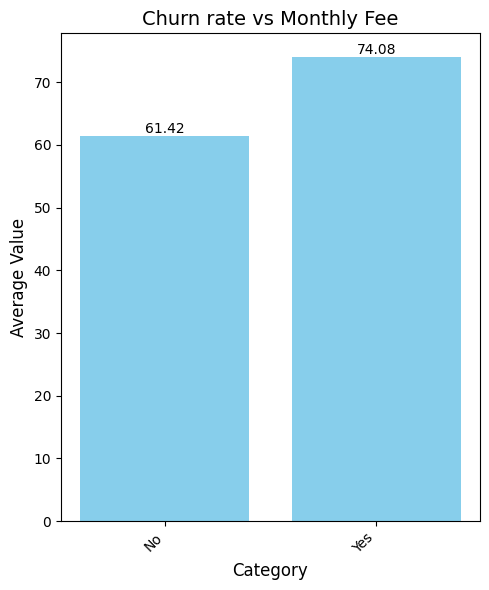

In [8]:
import matplotlib.pyplot as plt
agg_data = df.groupby('left_flag')['monthly_fee'].mean().sort_values()

# Create bar chart
plt.figure(figsize=(5,6))
bars = plt.bar(agg_data.index, agg_data.values, color='skyblue')

# Add labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.title('Churn rate vs Monthly Fee', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Optional: show values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


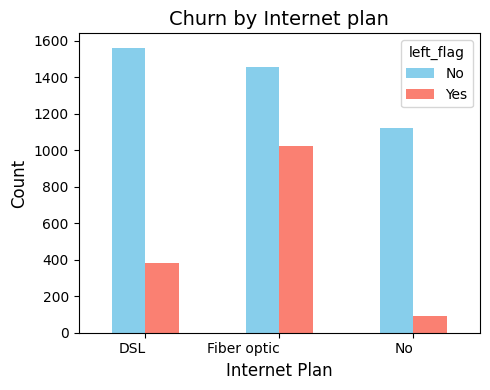

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cross_tab = pd.crosstab(df['internet_plan'], df['left_flag'])
cross_tab.plot(kind='bar', figsize=(5,4), color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Internet Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Internet plan', fontsize=14)
plt.xticks(rotation=0, ha='right')

plt.legend(title='left_flag')
plt.tight_layout()
plt.show()


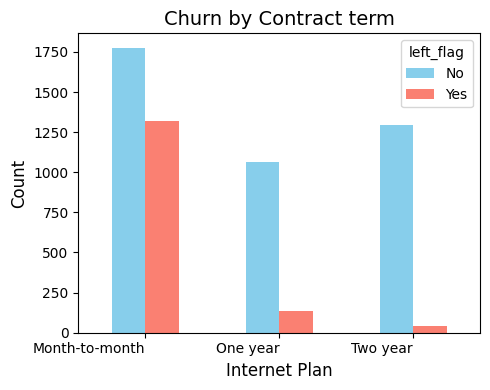

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


cross_tab = pd.crosstab(df['contract_term'], df['left_flag'])

cross_tab.plot(kind='bar', figsize=(5,4), color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Internet Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Contract term', fontsize=14)
plt.xticks(rotation=0, ha='right')

plt.legend(title='left_flag')
plt.tight_layout()
plt.show()


In [142]:
#Compare and check for the columns in both the data sets
cols_df1 = set(df.columns)
cols_df2 = set(df_holdout.columns)

# Columns that are in both
common_cols = cols_df1 & cols_df2

only_in_df1 = cols_df1 - cols_df2

# Columns only in df_holdout
only_in_df2 = cols_df2 - cols_df1

# print("Matching columns:")
# print(common_cols)

print("\nColumns only in df1:")
print(only_in_df1)

print("\nColumns only in df2:")
print(only_in_df2)



Columns only in df1:
set()

Columns only in df2:
set()


In [143]:
# df.isna().sum()

In [9]:
df.isna().sum()*100/len(df)

acct_ref                  0.000000
cust_ref                  0.000000
has_dependents            0.000000
tenure_mo                 0.000000
home_phone                0.000000
multi_line                0.000000
internet_plan             0.000000
add_on_security           0.000000
add_on_backup             0.000000
add_on_protection         0.000000
tech_support_std          0.000000
stream_tv                 0.000000
stream_movies             0.000000
contract_term             0.000000
e_bill_opt_in             0.000000
pay_method                0.000000
monthly_fee               0.000000
total_billed              0.141945
left_flag                 0.000000
fiscal_qtr                0.000000
gender                    0.000000
age_years                 0.000000
is_married                0.000000
dependents_count          0.000000
referred_friend           0.000000
referrals_count           0.000000
recent_offer             55.110007
avg_long_dist_fee         0.000000
internet_tech       

In [ ]:
#total bill has .14% ( 8)data missing and recent_offer has 55% internet tech has 21.5% missing 

In [7]:
missing_bill_df = df[df['total_billed'].isna()]

# See the tenure of these specific customers
print(missing_bill_df['tenure_mo'].value_counts())

tenure_mo
0    8
Name: count, dtype: int64


In [8]:
df['total_billed'] = pd.to_numeric(df['total_billed'], errors='coerce')
df['total_billed'] = df['total_billed'].fillna(0)

# 3.  verification
print(f"TotalBilled Missing: {df['total_billed'].isna().sum()}")

TotalBilled Missing: 0


In [9]:
counts = df['left_flag'].value_counts()
print(counts)

left_flag
No     4140
Yes    1496
Name: count, dtype: int64


In [10]:
categories = df['recent_offer'].unique()
print(f"Number of categories: {len(categories)}")
print(categories)

categories2 = df['internet_tech'].unique()
print(f"Number of categories: {len(categories2)}")
print(categories2)

Number of categories: 6
['Offer E' nan 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Number of categories: 4
['DSL' 'Fiber Optic' nan 'Cable']


In [11]:
## Replace 'nan' in internet_tech - "Missing"
## Replace 'nan' in recent_offer - "No Offer"
from sklearn.impute import SimpleImputer

cols_to_impute = ['internet_tech']
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

df.loc[:, cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [12]:
# -- recent_offer replace na with "No Offer"

cols_to_impute = ['recent_offer']
imputer = SimpleImputer(strategy='constant', fill_value='No Offer')

df.loc[:, cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [44]:
df.head()

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,Offer E,0.00,DSL,10,No,No,Yes,0.0,0,0.00
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,No Offer,17.09,DSL,16,No,No,Yes,0.0,0,581.06
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,No Offer,10.47,DSL,21,No,No,Yes,0.0,0,20.94
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,No Offer,0.00,DSL,10,Yes,No,Yes,0.0,0,0.00
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,No Offer,9.12,Fiber Optic,51,No,No,Yes,0.0,0,18.24


In [13]:
#drop columns which do not serve purpose in the analysis
df = df.drop(columns=["acct_ref", "cust_ref", "fiscal_qtr"])

In [14]:
#Replace dependent_count with 0 when has_dependent is No

mask_no = df["has_dependents"].str.strip().str.lower().eq("no")

mask_fix = mask_no & (df["dependents_count"] != 0)

# replace the values in  dependents_count with 0 for those rows
df.loc[mask_fix, "dependents_count"] = 0

print(f"Rows corrected: {mask_fix.sum()}")

Rows corrected: 28


In [15]:
#drop the has_dependent column and referred_friend Yes has corresponding value in referral_count which makes this column redundant
df.drop(columns=["has_dependents", "referred_friend"], inplace=True)

# Preprocessing for holdout data

In [16]:
df_holdout.isna().sum()

acct_ref                   0
cust_ref                   0
has_dependents             0
tenure_mo                  0
home_phone                 0
multi_line                 0
internet_plan              0
add_on_security            0
add_on_backup              0
add_on_protection          0
tech_support_std           0
stream_tv                  0
stream_movies              0
contract_term              0
e_bill_opt_in              0
pay_method                 0
monthly_fee                0
total_billed               3
left_flag                  0
fiscal_qtr                 0
gender                     0
age_years                  0
is_married                 0
dependents_count           0
referred_friend            0
referrals_count            0
recent_offer             771
avg_long_dist_fee          0
internet_tech            314
avg_gb_download            0
premium_support            0
stream_music               0
unlimited_data_opt         0
refunds_total              0
extra_data_fee

In [17]:
df_holdout['total_billed'] = pd.to_numeric(df_holdout['total_billed'], errors='coerce')
df_holdout['total_billed'] = df_holdout['total_billed'].fillna(0)

# 3.  verification
print(f"TotalBilled Missing: {df_holdout['total_billed'].isna().sum()}")

## Replace 'nan' in internet_tech - "Missing"
from sklearn.impute import SimpleImputer

cols_to_impute = ['internet_tech']
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

df_holdout.loc[:, cols_to_impute] = imputer.fit_transform(df_holdout[cols_to_impute])



TotalBilled Missing: 0


In [18]:
# -- recent_offer replace na with "No Offer"

cols_to_impute = ['recent_offer']
imputer = SimpleImputer(strategy='constant', fill_value='No Offer')

df_holdout.loc[:, cols_to_impute] = imputer.fit_transform(df_holdout[cols_to_impute])

In [19]:
categories = df_holdout['recent_offer'].unique()
print(f"Number of categories: {len(categories)}")
print(categories)

categories2 = df_holdout['internet_tech'].unique()
print(f"Number of categories: {len(categories2)}")
print(categories2)

Number of categories: 6
['No Offer' 'Offer B' 'Offer D' 'Offer E' 'Offer C' 'Offer A']
Number of categories: 4
['Cable' 'DSL' 'Fiber Optic' 'Missing']


In [20]:
#drop columns which do not serve purpose in the analysis
df_holdout = df_holdout.drop(columns=["acct_ref", "cust_ref", "fiscal_qtr"])

In [21]:
#Replace dependent_count with 0 when has_dependent is No

mask_no = df_holdout["has_dependents"].str.strip().str.lower().eq("no")

mask_fix = mask_no & (df_holdout["dependents_count"] != 0)

# replace the values in  dependents_count with 0 for those rows
df_holdout.loc[mask_fix, "dependents_count"] = 0

print(f"Rows corrected: {mask_fix.sum()}")

Rows corrected: 6


In [22]:
#drop the has_dependent column and referred_friend Yes has corresponding value in referral_count which makes this column redundant
df_holdout.drop(columns=["has_dependents", "referred_friend"], inplace=True)

In [23]:
df.shape


(5636, 31)

In [24]:
df_holdout.shape


(1407, 31)

In [25]:
print(df["left_flag"].dtype)                     # what type is it? 
print(df["left_flag"].unique())   

object
['No' 'Yes']


In [26]:
assert set(df["left_flag"].unique()) <= {"Yes", "No"}

Y = df["left_flag"].map({"No": 0, "Yes": 1})
X = pd.get_dummies(df.drop(columns=["left_flag"]), drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold

#Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3,     # 30% test, 70% train
    random_state=99,   # reproducibility
    shuffle=True       # shuffle before splitting
)

# Check shapes
X_train.shape, X_test.shape

((3945, 47), (1691, 47))

In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lambdas = np.logspace(-2, 2, 20) 

# 2. Setup Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Build the Pipeline with the fix for class imbalance
logit_lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegressionCV(
        Cs=1/lambdas,             # C = 1/lambda
        cv=cv,
        penalty="l1",
        solver="saga",            # Required for L1
        scoring="roc_auc",        # Optimizing for AUC
        max_iter=5000,            # Increased for convergence
        # class_weight='balanced',  # Fixes the 'Gap' in your data
        n_jobs=-1,
        random_state=42
    ))
])

# 4. Fit the model
logit_lasso_pipe.fit(X_train, Y_train)

# 5. Extract results
best_C = logit_lasso_pipe.named_steps["model"].C_[0]
best_lambda = 1.0 / best_C

print(f"--- Optimization Results ---")
print(f"Best C Score: {best_C:.6f}")
print(f"Best Lambda (λ): {best_lambda:.6f}")

--- Optimization Results ---
Best C Score: 2.069138
Best Lambda (λ): 0.483293


In [29]:
# Get coefficients from the fitted LASSO model it automatically chooses the best C(1/λ)
lasso_model = logit_lasso_pipe.named_steps["model"]

# Match each coefficient with its feature name
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lasso_model.coef_.ravel()   # .coef_ is shape (1, n_features) for binary;
                                               # ravel() flattens it into a 1-D array
})

# Keep only non-zero coefficients (the ones LASSO thinks are important)
important_coefs = coef_df[coef_df["coefficient"] != 0]

# Sort by absolute size of the coefficient -- the larger the more important
important_coefs = important_coefs.reindex(
    important_coefs["coefficient"].abs().sort_values(ascending=False).index
)
print("Important features selected by LASSO:")
display(important_coefs)


Important features selected by LASSO:


,feature,coefficient
14,internet_plan_Fiber optic,2.771406
42,internet_tech_Fiber Optic,-2.512147
5,referrals_count,-1.746301
0,tenure_mo,-1.137500
35,is_married_Yes,0.912396
4,dependents_count,-0.891143
29,contract_term_Two year,-0.541502
28,contract_term_One year,-0.323272
2,total_billed,0.277291
25,stream_tv_Yes,0.211899


In [30]:
# Extract feature names and their corresponding coefficients
feature_names = X_train.columns 
coefficients = logit_lasso_pipe.named_steps["model"].coef_[0]

# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Filter out features that LASSO dropped (Coefficient == 0)
important_features = importance_df[importance_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

print(f"Total features kept: {len(important_features)} out of {len(feature_names)}")
print("\nTop 5 Positive Predictors in lasso model:")
print(important_features.head(5))

print("\nTop 5 Negative Predictors  lasso model:")
print(important_features.tail(5))

Total features kept: 46 out of 47

Top 5 Positive Predictors in lasso model:
                      Feature  Coefficient
14  internet_plan_Fiber optic     2.771406
35             is_married_Yes     0.912396
2                total_billed     0.277291
25              stream_tv_Yes     0.211899
45           stream_music_Yes     0.185049

Top 5 Negative Predictors  lasso model:
                      Feature  Coefficient
29     contract_term_Two year    -0.541502
4            dependents_count    -0.891143
0                   tenure_mo    -1.137500
5             referrals_count    -1.746301
42  internet_tech_Fiber Optic    -2.512147


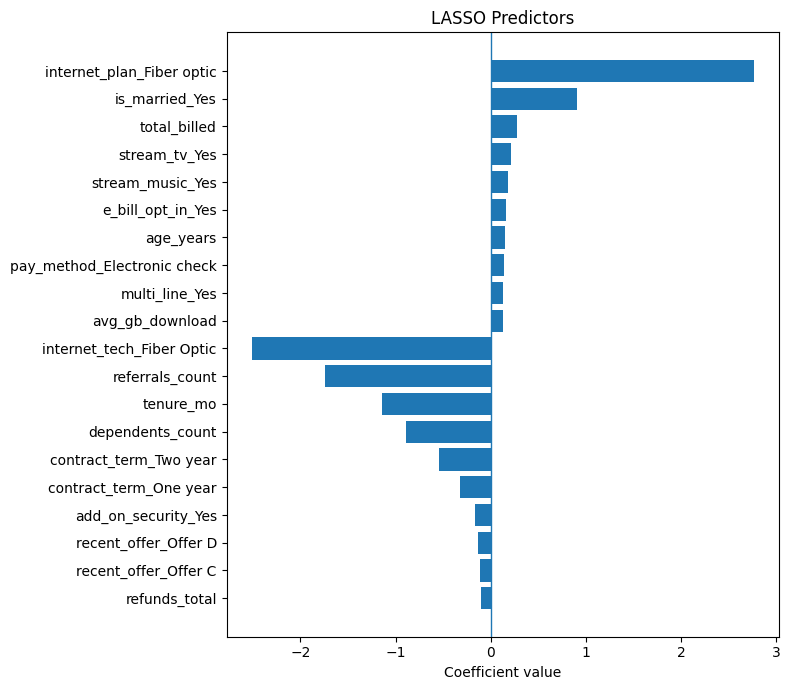

In [31]:
import matplotlib.pyplot as plt
top_pos = important_features.sort_values("Coefficient", ascending=False).head(10)
top_neg = important_features.sort_values("Coefficient").head(10)

plot_df = pd.concat([top_pos, top_neg])

plt.figure(figsize=(8, 7))
plt.barh(plot_df["Feature"], plot_df["Coefficient"])
plt.axvline(0, linewidth=1)
plt.xlabel("Coefficient value")
plt.title("LASSO Predictors")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [32]:
# Filter for features where the coefficient is exactly zero
zeroed_features = importance_df[importance_df['Coefficient'] == 0]

print(f"Total features zeroed out: {len(zeroed_features)}")

if len(zeroed_features) > 0:
    print("\nFeatures dropped by LASSO:")
    print(zeroed_features['Feature'].to_string(index=False))
else:
    print("\nNo features were zeroed out by the model.")

Total features zeroed out: 1

Features dropped by LASSO:
monthly_fee


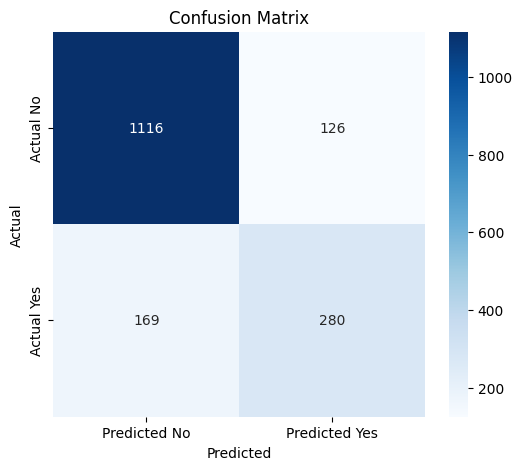

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = logit_lasso_pipe.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

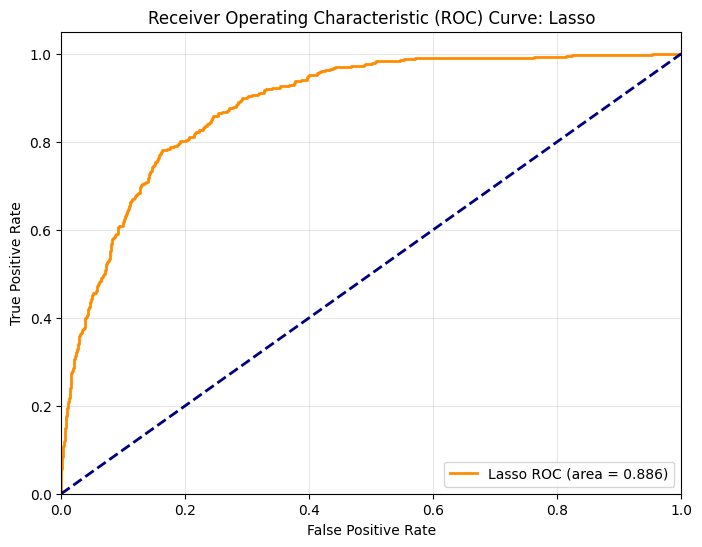

Test Set ROC-AUC: 0.8860


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_probs = logit_lasso_pipe.predict_proba(X_test)[:, 1]

# 2. Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# 3. Calculate AUC
roc_auc = auc(fpr, tpr)

# 4. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Lasso ROC (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal luck line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Lasso')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"Test Set ROC-AUC: {roc_auc:.4f}")

#  Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Random Forest model

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

# 3. Parameter grid (tailored for Random Forest)
rf_param_grid = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}

# 4. Pipeline
rf_pipe = Pipeline([
    # "preprocess", pre 
    ("model", rf)
])

# 5. Grid search
rf_search = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# 6. Fit
rf_search.fit(X_train, Y_train)

# 7. Results
best_rf_model = rf_search.best_estimator_
best_rf_auc = rf_search.best_score_

print(f"Random Forest Best CV AUC: {best_rf_auc:.6f}")

# 8. Test AUC
y_rf_test_pred = best_rf_model.predict_proba(X_test)[:, 1]
print(f"Random Forest Test AUC: {roc_auc_score(Y_test, y_rf_test_pred):.6f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Random Forest Best CV AUC: 0.880110
Random Forest Test AUC: 0.883782


Top 10 Features (Random Forest):
                   Feature  Importance
0                tenure_mo    0.103358
5          referrals_count    0.103301
2             total_billed    0.082991
10    long_dist_fees_total    0.067922
1              monthly_fee    0.063258
4         dependents_count    0.055179
29  contract_term_Two year    0.048409
6        avg_long_dist_fee    0.047938
3                age_years    0.047342
7          avg_gb_download    0.043673


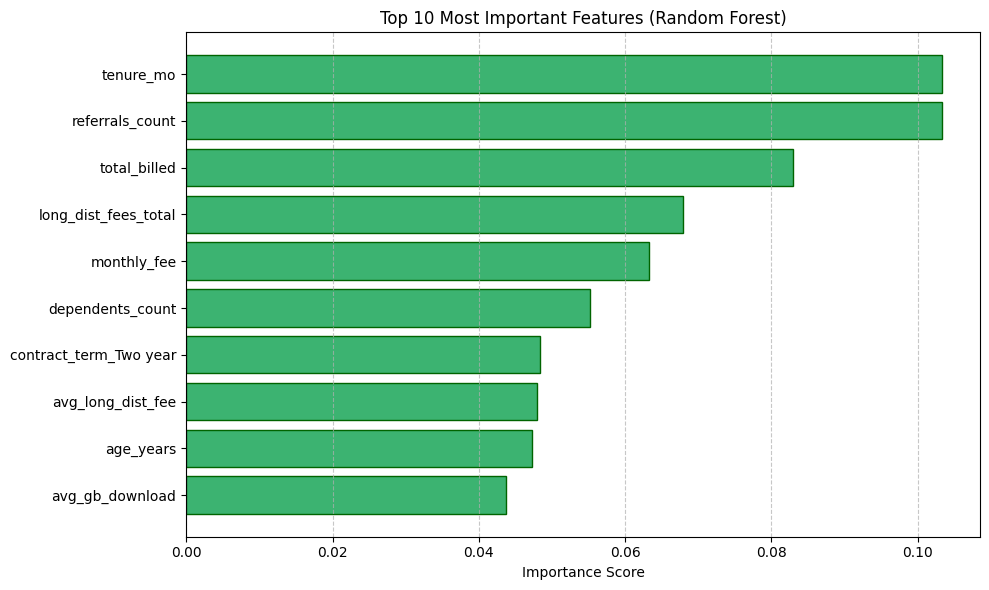

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

final_rf = rf_search.best_estimator_.named_steps["model"]

feature_names = X_train.columns

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': final_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_10_rf = rf_importance_df.head(10)
print("Top 10 Features (Random Forest):")
print(top_10_rf)

plt.figure(figsize=(10, 6))
plt.barh(top_10_rf['Feature'][::-1], top_10_rf['Importance'][::-1], color='mediumseagreen', edgecolor='darkgreen')
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Testing XGBoost. to maximize the predictive accuracy

In [74]:
X.shape

(5636, 47)

In [53]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# 1. Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. XGBoost model 
# Added tree_method="hist" for faster training on modern CPUs/GPUs
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist", 
    enable_categorical=True,
    random_state=42,
    n_jobs=-1
)

# 3. Parameter distributions (using ranges or lists)
# RandomizedSearch pulls from these lists randomly
param_dist = {
    "model__n_estimators": [300, 500, 1000],
    "model__max_depth": [3, 5, 7, 9],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__reg_alpha": [0, 0.1, 1.0],
    "model__reg_lambda": [1, 5, 10]
}

# 4. Pipeline
xgb_pipe = Pipeline([
    ("model", xgb)
])

# 5. Randomized search
xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=50, 
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 6. Fit
xgb_search.fit(X_train, Y_train)

# 7. Results
best_model = xgb_search.best_estimator_

# 8. Test AUC
y_test_pred = best_model.predict_proba(X_test)[:, 1]
print(f"Test AUC: {roc_auc_score(Y_test, y_test_pred):.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Test AUC: 0.8911



Top 10 Features:
                        Feature  Importance
14    internet_plan_Fiber optic    0.179032
29       contract_term_Two year    0.115515
5               referrals_count    0.072358
32  pay_method_Electronic check    0.065328
4              dependents_count    0.060508
28       contract_term_One year    0.056240
0                     tenure_mo    0.053652
30            e_bill_opt_in_Yes    0.035201
17          add_on_security_Yes    0.028513
35               is_married_Yes    0.022814


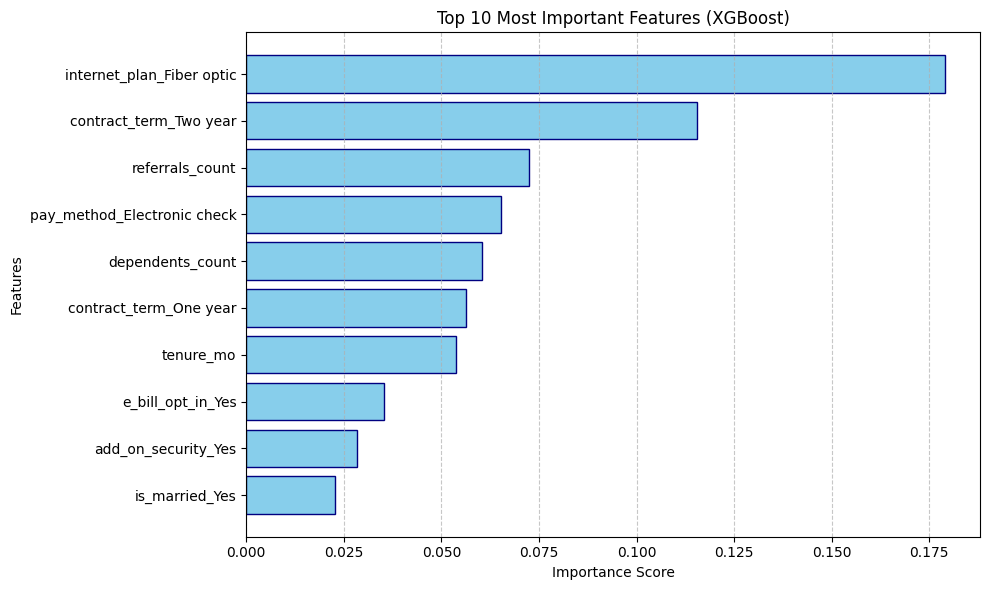

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

final_xgb = xgb_search.best_estimator_.named_steps["model"]
feature_names = X_train.columns


importances = final_xgb.feature_importances_

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Display Top 10
top_10 = feature_imp_df.head(10)
print("\nTop 10 Features:")
print(top_10)

# 5. Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'][::-1], top_10['Importance'][::-1], color='skyblue', edgecolor='navy')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
Ytest_prob = xgb_search.predict_proba(X_test)[:, 1]

Optimum Threshold: 0.206296
Best J-Statistic: 0.615591


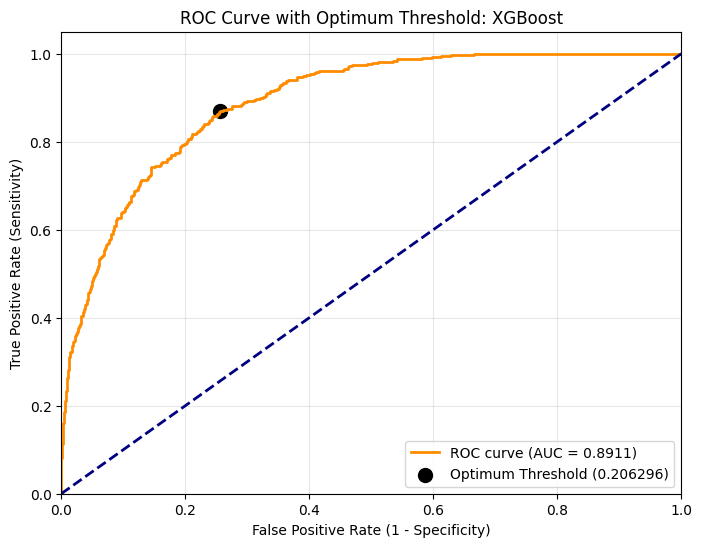


Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1242
           1       0.55      0.87      0.68       449

    accuracy                           0.78      1691
   macro avg       0.75      0.81      0.75      1691
weighted avg       0.84      0.78      0.79      1691



In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report

#Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

#Find the optimum threshold (Youden's J Statistic)
# J = TPR - FPR. We find the index of the maximum J value.
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
opt_threshold = thresholds[best_idx]

print(f"Optimum Threshold: {opt_threshold:.6f}")
print(f"Best J-Statistic: {j_scores[best_idx]:.6f}")

# 3. Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

#Mark the optimum threshold on the plot
plt.scatter(fpr[best_idx], tpr[best_idx], color='black', marker='o', s=100, 
            label=f'Optimum Threshold ({opt_threshold:.6f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve with Optimum Threshold: XGBoost')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Apply the optimum threshold to get binary predictions
y_final_pred = (y_test_pred >= opt_threshold).astype(int)

#Show classification results with the new threshold
print("\nClassification Report (Optimized Threshold):")
print(classification_report(Y_test, y_final_pred))

Generating SHAP Summary Plot...


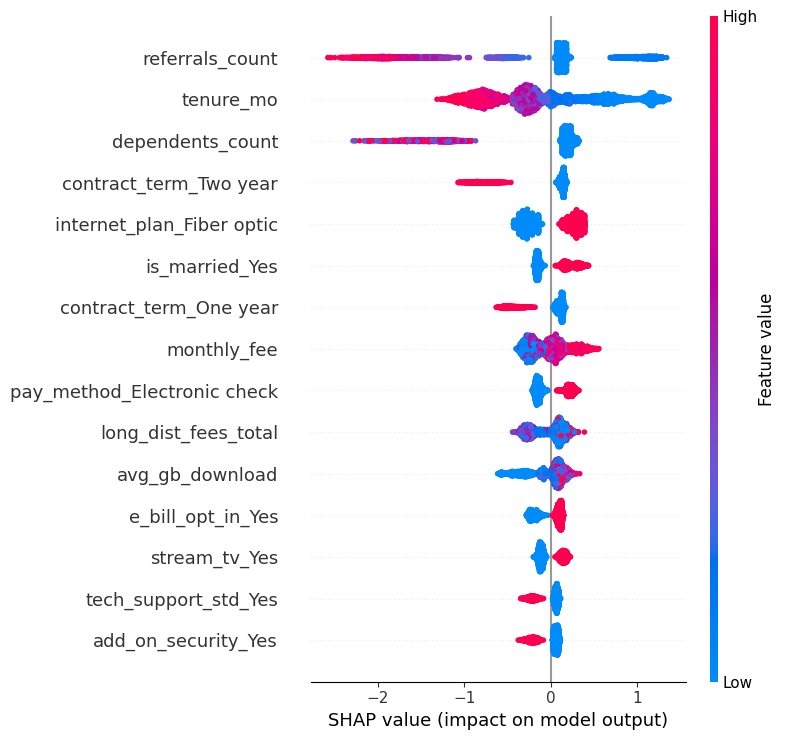

In [49]:
import shap


best_pipeline = xgb_search.best_estimator_
best_xgb = best_pipeline.named_steps["model"]

if "preprocess" in best_pipeline.named_steps:
    pre = best_pipeline.named_steps["preprocess"]
    X_train_transformed = pre.transform(X_train)
    
    # Get feature names from the preprocessor if possible
    if hasattr(pre, "get_feature_names_out"):
        feature_names = pre.get_feature_names_out()
    else:
        feature_names = None
else: 
    X_train_transformed = X_train
    feature_names = X_train.columns if hasattr(X_train, "columns") else None


# TreeExplainer is optimized for XGBoost
explainer = shap.TreeExplainer(best_xgb)

# 4. Compute SHAP values
# For XGBoost, shap_values is often a simple array (for binary classification)
shap_values = explainer.shap_values(X_train_transformed)

# 5. Visualization
# We use summary_plot (Beeswarm) to see impact and direction
print("Generating SHAP Summary Plot...")
shap.summary_plot(
    shap_values, 
    X_train_transformed, 
    max_display=15, 
    feature_names=feature_names,
    show=True
)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# 1. Map your models to their respective variables
# Note: 'logit_lasso_pipe' is the name from your specific Lasso implementation
models = [
    ("XGBoost", xgb_search),
    ("Random Forest", rf_search),
    ("Lasso", logit_lasso_pipe)
]

comparison_results = []

for name, model_obj in models:
    # Handle the fact that Lasso is a Pipeline/CV object while others are GridSearchCV
    if hasattr(model_obj, "best_estimator_"):
        # This handles XGBoost and Random Forest
        best_model = model_obj.best_estimator_
        cv_auc = model_obj.best_score_
    else:
        # This handles your logit_lasso_pipe (LogisticRegressionCV)
        best_model = model_obj
        # Pull the best mean AUC from the internal scores_ attribute
        cv_auc = model_obj.named_steps["model"].scores_[1].mean(axis=0).max()
    
    # Generate predictions on the hold-out test set
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)
    
    # Calculate performance metrics for the comparison
    comparison_results.append({
        "Model": name,
        "Test AUC": round(roc_auc_score(Y_test, y_prob), 4),
        "F1-Score": round(f1_score(Y_test, y_pred), 4),
        "Recall": round(recall_score(Y_test, y_pred), 4),
        "Precision": round(precision_score(Y_test, y_pred), 4),
        "Accuracy": round(accuracy_score(Y_test, y_pred), 4),
        "Best CV AUC": round(cv_auc, 4)
    })

# 2. Create the DataFrame and sort by Test AUC to find the winner
comparison_df = pd.DataFrame(comparison_results).sort_values(by="Test AUC", ascending=False)

print("--- Final Model Comparison Table ---")
print(comparison_df.to_string(index=False))

--- Final Model Comparison Table ---
        Model  Test AUC  F1-Score  Recall  Precision  Accuracy  Best CV AUC
      XGBoost    0.8911    0.6627  0.6258     0.7043    0.8309       0.8902
        Lasso    0.8860    0.6550  0.6236     0.6897    0.8255       0.8856
Random Forest    0.8838    0.6637  0.6637     0.6637    0.8214       0.8801


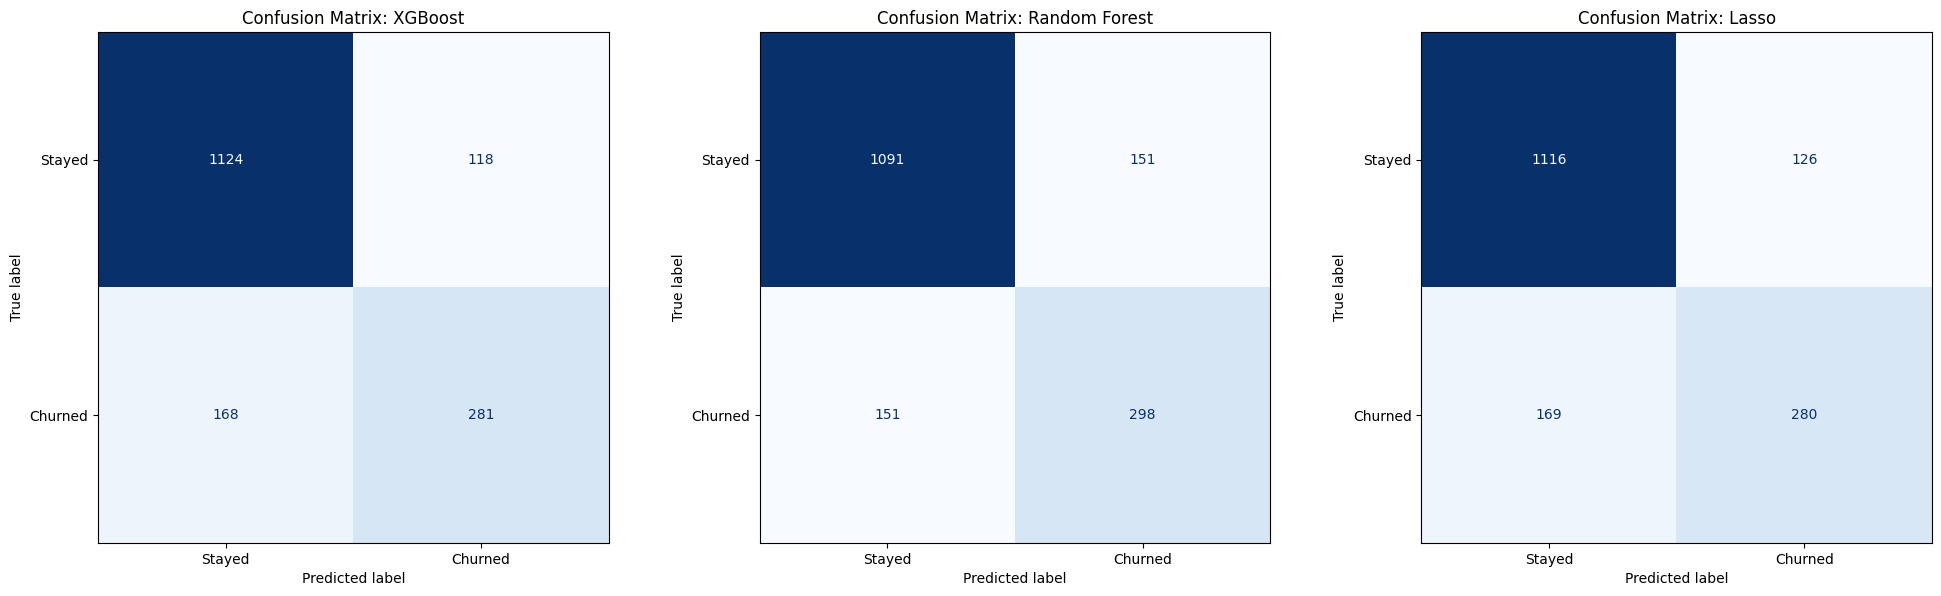

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Define the models to visualize
# We use the names from your specific variables: xgb_search, rf_search, logit_lasso_pipe
plot_models = [
    ("XGBoost", xgb_search.best_estimator_),
    ("Random Forest", rf_search.best_estimator_),
    ("Lasso", logit_lasso_pipe)
]

# 2. Create the figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (name, model) in enumerate(plot_models):
    ConfusionMatrixDisplay.from_estimator(
        model, 
        X_test, 
        Y_test, 
        ax=axes[i], 
        display_labels=["Stayed", "Churned"],
        cmap="Blues",
        colorbar=False
    )
    axes[i].set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()

In [66]:
#Hold out data test

In [82]:
df_holdout['left_flag'].unique()

array(['Yes', 'No'], dtype=object)

In [83]:
best_model = xgb_search.best_estimator_

In [84]:
# Adjust target column name
X_holdout = df_holdout.drop(columns=["left_flag"])
Y_holdout = df_holdout["left_flag"]

In [85]:
cat_cols = X_holdout.select_dtypes(include=["object"]).columns

for col in cat_cols:
    X_holdout[col] = X_holdout[col].astype("category")


In [86]:
X_holdout = X_holdout.reindex(columns=X_train.columns)

In [93]:
from sklearn.metrics import roc_auc_score

y_holdout_pred = best_model.predict_proba(X_holdout)[:, 1]

holdout_auc = roc_auc_score(Y_holdout, y_holdout_pred)

print(f"XGBoost Holdout AUC: {holdout_auc:.6f}")


XGBoost Holdout AUC: 0.831804


In [94]:
y_holdout_class = (y_holdout_pred >= 0.5).astype(int)

# To convert Y_holdout from 'Yes'/'No' to 1/0 to match prediction format
# Create a mapping dictionary
label_map = {'No': 0, 'Yes': 1}
Y_holdout_numeric = np.array([label_map[label] for label in Y_holdout])

metrics_table = pd.DataFrame({
    "Metric": ["AUC", "F1 Score", "Precision", "Recall", "Accuracy"],
    "Value": [
        roc_auc_score(Y_holdout_numeric, y_holdout_pred),  
        f1_score(Y_holdout_numeric, y_holdout_class),      
        precision_score(Y_holdout_numeric, y_holdout_class),
        recall_score(Y_holdout_numeric, y_holdout_class),
        accuracy_score(Y_holdout_numeric, y_holdout_class)
    ]
})

metrics_table["Value"] = metrics_table["Value"].round(4)

metrics_table

,Metric,Value
0,AUC,0.8318
1,F1 Score,0.2125
2,Precision,0.7667
3,Recall,0.1233
4,Accuracy,0.7576


In [96]:
import pandas as pd

X_holdout_with_pred = X_holdout.copy() 
X_holdout_with_pred['predicted_proba'] = y_holdout_pred

X_holdout_with_pred.to_csv("holdout_predictions.csv", index=False)


In [97]:
print(X_holdout_with_pred.describe(include='all'))

         tenure_mo  monthly_fee  total_billed    age_years  dependents_count  \
count  1407.000000  1407.000000   1407.000000  1407.000000       1407.000000   
mean     32.074627    64.672210   2252.174591    45.827292          0.476190   
std      24.739484    30.201031   2272.159020    16.722295          0.975865   
min       0.000000    18.800000      0.000000    19.000000          0.000000   
25%       9.000000    34.675000    372.175000    31.000000          0.000000   
50%      27.000000    70.550000   1350.150000    45.000000          0.000000   
75%      56.000000    89.550000   3718.600000    59.000000          0.000000   
max      72.000000   118.350000   8594.400000    80.000000          8.000000   

       referrals_count  avg_long_dist_fee  avg_gb_download  refunds_total  \
count      1407.000000        1407.000000      1407.000000    1407.000000   
mean          1.932480          23.512118        20.973703       2.233241   
std           2.956607          15.263744       